## Section 1: Imports and Setup

In [34]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Malek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Malek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import joblib

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

FILE_PATH = 'YoutubeCommentsDataSet.csv'

## Section 2: Data Loading

In [36]:
try:
    data = pd.read_csv(FILE_PATH)
    print(f"Data loaded successfully from {FILE_PATH}.")
except Exception as e:
    print(f"Error loading data from {FILE_PATH}: {e}")
    data = None

if data is None:
    raise ValueError("Data loading failed. Exiting.")

Data loaded successfully from YoutubeCommentsDataSet.csv.


## Section 3: Data Preprocessing

In [37]:
stop_words = set(stopwords.words('english'))

cleaned_comments = []
for comment in data['Comment']:
    text = str(comment).lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()  
    clean_words = [word for word in words if word not in stop_words]
    cleaned_comments.append(' '.join(clean_words))

data['Cleaned_Comment'] = cleaned_comments

le = LabelEncoder()
data['Sentiment_Encoded'] = le.fit_transform(data['Sentiment'])
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

## Section 4: Exploratory Data Analysis (EDA)

C:\Users\Malek\AppData\Local\Temp\ipykernel_11164\430228981.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='viridis')


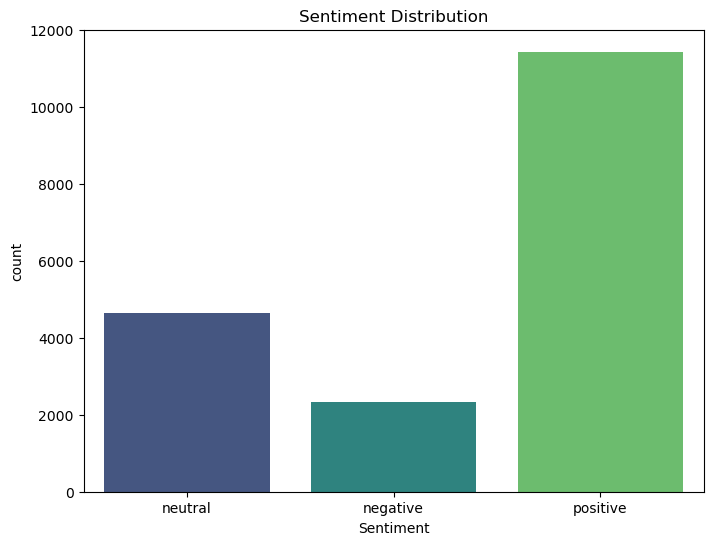

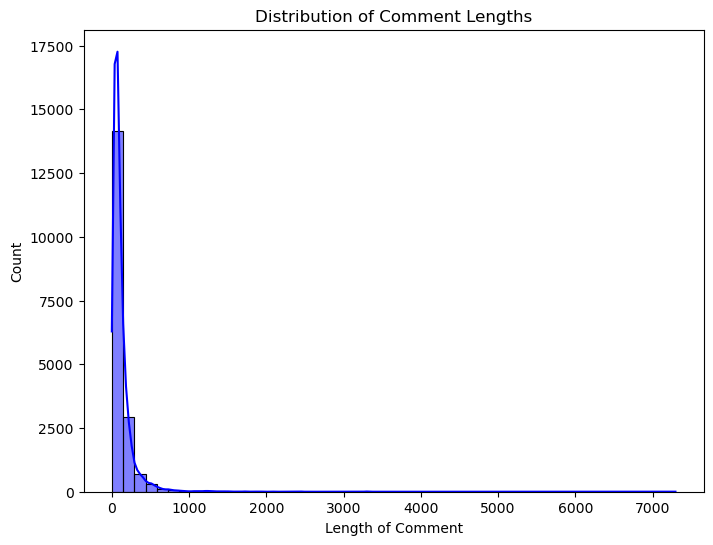

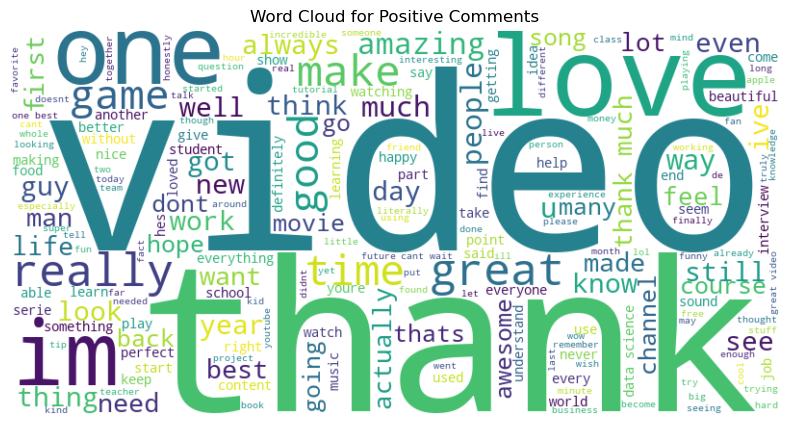

EDA completed. Visualizations displayed.


In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

data['Comment_Length'] = data['Cleaned_Comment'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data['Comment_Length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Comment Lengths')
plt.xlabel('Length of Comment')
plt.show()

positive_comments = ' '.join(data[data['Sentiment'] == 'positive']['Cleaned_Comment'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Comments')
plt.show()

print("EDA completed. Visualizations displayed.")

## Section 5: Feature Extraction and Data Splitting

In [39]:
X = data['Cleaned_Comment']
y = data['Sentiment_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

## Section 6: Model Training and Evaluation

In [40]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
    results[name] = {'model': model, 'accuracy': accuracy, 'report': report}
    joblib.dump(model, f'{name.lower().replace(" ", "_")}_model.pkl')
    print(f"{name} Accuracy: {accuracy:.4f}")

joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
print("All models and TF-IDF vectorizer saved.")

print("\nModel Comparison:")
for name, result in results.items():
    print(f"{name}: Accuracy = {result['accuracy']:.4f}")

Training Logistic Regression...
Logistic Regression Accuracy: 0.7485
Training Naive Bayes...
Naive Bayes Accuracy: 0.6784
Training SVM...
SVM Accuracy: 0.7482
Training Random Forest...
Random Forest Accuracy: 0.7281
Training XGBoost...


c:\Users\Malek\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:31:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7300
All models and TF-IDF vectorizer saved.

Model Comparison:
Logistic Regression: Accuracy = 0.7485
Naive Bayes: Accuracy = 0.6784
SVM: Accuracy = 0.7482
Random Forest: Accuracy = 0.7281
XGBoost: Accuracy = 0.7300
